# 🏆 Hiring Challenge : Construction D’un Agent Conversationnel Spécialisé 🤖  

## 📌 Objectif  
Nous devons construire un agent conversationnel capable de répondre aux questions sur des documents spécifiques.  

## 📂 Source des données  
Les données proviennent du site **Ecofin** et sont constituées des articles publiés au cours de la dernière semaine.  

- **Site web source :** [Ecofin](https://www.agenceecofin.com/) 🌍  
- **Période des données extraites :** **22 janvier 2024 - 28 janvier 2024 ** 📅  

## 🚀 Tâches à réaliser  
1. **Scraper** 🕵️ les articles publiés sur Ecofin entre le **22/01/2024 et le 28/01/2024**.  
2. **Traiter** 🔍 les données extraites (nettoyage, structuration, vectorisation).  
3. **Stocker** 💾 ces informations pour une interrogation efficace.  
4. **Construire un agent conversationnel** 💬 qui pourra répondre aux questions basées sur ces articles.  


# 📰 Scraping des Articles du Site Ecofin 🕵️‍♂️  

## 📌 Objectif  
Cette section a pour but d'extraire les articles publiés sur le site **Ecofin** au cours de la dernière semaine (**22 janvier 2024 - 28 janvier 2024**).  

## ⚙️ Méthodologie  
- **Parcours des pages du site** via les liens de pagination.  
- **Extraction des articles récents** en filtrant ceux publiés après le **22 janvier 2024**.  
- **Stockage des données** sous forme d'un DataFrame contenant :  
  - **Titre** de l'article 📌  
  - **Date de publication** 📅  
  - **Résumé du texte** 📄  
  - **Lien vers l'article** 🔗  

## 🚀 Lancement du Scraping  
Le script parcourt les pages, extrait les données et s'arrête dès qu'il détecte un article plus ancien que la date limite fixée (**22 janvier 2024**).  


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

# URL de base
BASE_URL = "https://www.agenceecofin.com/"
START_URL = f"{BASE_URL}a-la-une/recherche-article/articles?submit_x=0&submit_y=0&filterTousLesFils=Tous&filterCategories=Sous-rubrique&filterFrench=French&userSearch=1&testlimitstart=147"

# Initialisation des variables
visited_pages = set()

# Définir la période (de maintenant à il y a 7 jours)

end_date = datetime(2025, 1, 28)  # Date de fin souhaitée
start_date = datetime(2025, 1, 22)  # Date de début souhaitée

# Fonction pour vérifier si une date est dans l'intervalle spécifié
def is_within_date_range(article_date):
    try:
        article_date = datetime.strptime(article_date, "%d/%m/%Y")
        return start_date <= article_date <= end_date
    except ValueError:
        return False

# Fonction pour extraire les données des articles sur une page
def scrape_page(soup, current_url):
    articles = []
    stop_scraping = False

    # Trouver tous les articles
    for h3 in soup.find_all('h3', class_='r'):
        a_tag = h3.find('a')
        if a_tag and 'href' in a_tag.attrs:
            link = BASE_URL + a_tag['href'].lstrip('/')
            title = a_tag.text.strip()

            # Trouver la date associée à l'article
            date_tag = h3.find_next('span', class_='f nsa')
            date = date_tag.text.strip() if date_tag else "Date non disponible"

            # Accéder à l'article pour extraire le texte
            article_response = requests.get(link)
            article_soup = BeautifulSoup(article_response.content, 'html.parser')

            # Extraire le texte des paragraphes dans itemIntroText
            text_div = article_soup.find('div', class_='itemIntroText')
            paragraphs = text_div.find_all('p') if text_div else []
            text = ' '.join([p.text.strip() for p in paragraphs]) if paragraphs else "Texte non disponible"

            # Vérifier si l'article est dans la plage de dates spécifiée
            if is_within_date_range(date):
                articles.append({"title": title, "date": date, "text": text, "page_url": link})
            else:
                # Si une date hors plage est trouvée, marquer pour arrêter le scraping
                print(f"Article hors plage détecté : {date}. Arrêt du scraping.")
                stop_scraping = True
                break

    return articles, stop_scraping

# Fonction pour trouver l'URL de la page suivante
def get_next_page_url(soup):
    pagination_ul = soup.find('ul', class_='pagination')
    if not pagination_ul:
        return None  # Pas de pagination

    li_tags = pagination_ul.find_all('li')
    for li in li_tags:
        link_tag = li.find('a')
        if link_tag and 'Suivant' in link_tag.text:  
            next_url = BASE_URL + link_tag['href']
            if next_url not in visited_pages:  # Vérifie si la page a déjà été visitée
                return next_url

    return None

# Fonction principale pour parcourir toutes les pages et extraire les données
def scrape_all_pages(start_url):
    current_url = start_url
    all_articles = []

    while current_url:
        if current_url in visited_pages:
            print(f"Page déjà visitée : {current_url}")
            break

        print(f"Scraping : {current_url}")
        response = requests.get(current_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Ajouter la page à l'ensemble des pages visitées
        visited_pages.add(current_url)

        # Extraire les articles de la page actuelle
        articles, stop_scraping = scrape_page(soup, current_url)
        all_articles.extend(articles)

        # Arrêter si un article hors plage est détecté
        if stop_scraping:
            print("Arrêt du scraping car un article hors plage a été détecté.")
            break

        # Trouver l'URL de la page suivante
        next_url = get_next_page_url(soup)
        if not next_url or next_url in visited_pages:  # Vérifier si aucune nouvelle page n'est trouvée
            print("Fin de la pagination.")
            break  # Arrêter si aucune page suivante n'est trouvée

        current_url = next_url

    return all_articles

# Lancer le scraping
articles = scrape_all_pages(START_URL)



Scraping : https://www.agenceecofin.com/a-la-une/recherche-article/articles?submit_x=0&submit_y=0&filterTousLesFils=Tous&filterCategories=Sous-rubrique&filterFrench=French&userSearch=1&testlimitstart=147
Scraping : https://www.agenceecofin.com//a-la-une/recherche-article/articles?submit_x=0&submit_y=0&filterTousLesFils=Tous&filterCategories=Sous-rubrique&filterFrench=French&userSearch=1&testlimitstart=154
Scraping : https://www.agenceecofin.com//a-la-une/recherche-article/articles?submit_x=0&submit_y=0&filterTousLesFils=Tous&filterCategories=Sous-rubrique&filterFrench=French&userSearch=1&testlimitstart=161
Scraping : https://www.agenceecofin.com//a-la-une/recherche-article/articles?submit_x=0&submit_y=0&filterTousLesFils=Tous&filterCategories=Sous-rubrique&filterFrench=French&userSearch=1&testlimitstart=168
Scraping : https://www.agenceecofin.com//a-la-une/recherche-article/articles?submit_x=0&submit_y=0&filterTousLesFils=Tous&filterCategories=Sous-rubrique&filterFrench=French&userSear

In [13]:
# Convertir les articles en DataFrame
articles_df = pd.DataFrame(articles)

# Afficher le DataFrame des articles
articles_df.head()

,title,date,text,page_url
0,Sénégal : partenariat entre l’Etat et la CDC p...,28/01/2025,(Agence Ecofin) - Dans le but de soutenir l’ac...,https://www.agenceecofin.com/actualites-numeri...
1,BGFIBank renforce son engagement envers la con...,28/01/2025,( BGFIBank) - Le Groupe BGFIBank a marqué un t...,https://www.agenceecofin.com/actualites-financ...
2,"Elon Musk, le Sud-Africain",28/01/2025,(Agence Ecofin) - Après ce qu’il décrit comme ...,https://www.agenceecofin.com/whos-who/2801-125...
3,Bénin : le plan de refonte du système de trans...,28/01/2025,(Agence Ecofin) - En gestation depuis quelques...,https://www.agenceecofin.com/actualites-infras...
4,Crises humanitaires en Afrique : l'impact du g...,28/01/2025,"(Agence Ecofin) - En décembre 2024, les Nation...",https://www.agenceecofin.com/actualites/2801-1...


In [14]:
articles_df.tail()

,title,date,text,page_url
187,"Qui est Alino Faso, l’influenceur pro-Burkina ...",22/01/2025,(Agence Ecofin) - Soutien indéfectible du régi...,https://www.agenceecofin.com/whos-who/2201-125...
188,La montée en puissance de la mine d'or Séguéla...,22/01/2025,"(Agence Ecofin) - En Côte d’Ivoire, Fortuna Mi...",https://www.agenceecofin.com/actualites/2201-1...
189,L'assurtech sud-africaine Naked obtient 38 mil...,22/01/2025,(Agence Ecofin) - Cette opération constitue la...,https://www.agenceecofin.com/actualites-financ...
190,Nigeria : FCMB reçoit 44 millions $ de Proparc...,22/01/2025,(Agence Ecofin) - L'un des principaux défis au...,https://www.agenceecofin.com/actualites-financ...
191,"Russie-RCA : à Moscou, Faustin-Archange Touadé...",22/01/2025,(Agence Ecofin) - En misant sur des domaines s...,https://www.agenceecofin.com/actualites/2201-1...


In [16]:
# Supprimer "Agence Ecofin" de la colonne 'text'
articles_df['text'] = articles_df['text'].str.replace(r'\(Agence Ecofin\)', '', regex=True)

articles_df.head()

,title,date,text,page_url
0,Sénégal : partenariat entre l’Etat et la CDC p...,28/01/2025,- Dans le but de soutenir l’accélération de s...,https://www.agenceecofin.com/actualites-numeri...
1,BGFIBank renforce son engagement envers la con...,28/01/2025,( BGFIBank) - Le Groupe BGFIBank a marqué un t...,https://www.agenceecofin.com/actualites-financ...
2,"Elon Musk, le Sud-Africain",28/01/2025,- Après ce qu’il décrit comme un salut de l’E...,https://www.agenceecofin.com/whos-who/2801-125...
3,Bénin : le plan de refonte du système de trans...,28/01/2025,"- En gestation depuis quelques années, les ré...",https://www.agenceecofin.com/actualites-infras...
4,Crises humanitaires en Afrique : l'impact du g...,28/01/2025,"- En décembre 2024, les Nations Unies et leur...",https://www.agenceecofin.com/actualites/2801-1...


In [17]:
# Sauvegarde des résultats dans un fichier CSV
articles_df.to_csv("articles_recent_ecofin2.csv", index=False, encoding="utf-8")

### Quelques visualisations sur les données récupérées

In [18]:
df=articles_df.copy()
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
 

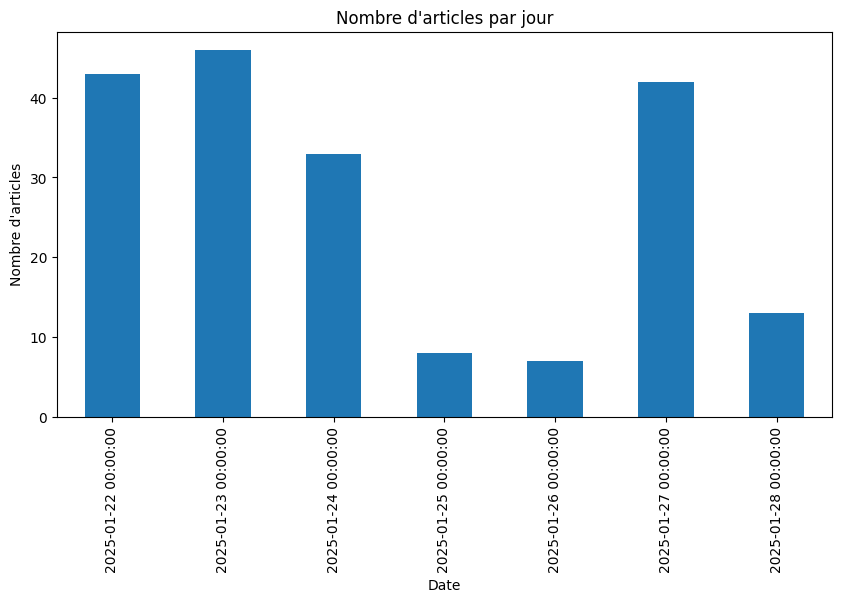

In [19]:
## Nombre d'articles par jour 
import matplotlib.pyplot as plt 

# Nombre d'articles par jour
articles_per_day = df['date'].value_counts().sort_index()
articles_per_day.plot(kind='bar', figsize=(10, 5))
plt.title("Nombre d'articles par jour")
plt.xlabel("Date")
plt.ylabel("Nombre d'articles")
plt.show()


# 🧠 Génération et Stockage des Embeddings avec FAISS 🚀  

## 📌 Objectif  
Cette section vise à **convertir les articles extraits en vecteurs numériques** à l'aide du modèle **Sentence Transformers** et à les stocker dans un **index FAISS** pour une recherche rapide et efficace.  

## 🔹 Étapes clés  
1. **Chargement des articles** depuis le fichier CSV.  
2. **Création des embeddings** avec le modèle `all-MiniLM-L6-v2`.  
3. **Indexation avec FAISS** pour une recherche vectorielle optimisée.  
4. **Sauvegarde de l'index** pour une utilisation future.  


In [20]:
from sentence_transformers import SentenceTransformer
from langchain.vectorstores import FAISS
from langchain.embeddings.base import Embeddings
import pandas as pd
from langchain.docstore.document import Document

# Classe personnalisée pour Sentence Transformers
class SentenceTransformersEmbeddings(Embeddings):
    def __init__(self, model_name="all-MiniLM-L6-v2"):
        self.model = SentenceTransformer(model_name)
    
    def embed_documents(self, texts):
        return self.model.encode(texts, show_progress_bar=True)
    
    def embed_query(self, text):
        return self.model.encode(text, show_progress_bar=False)

# Charger vos données
articles_df = pd.read_csv("articles_recent_ecofin2.csv")
documents = [
    Document(page_content=row['text'], metadata={"title": row['title'], "url": row['page_url'], "date": row['date']})
    for _, row in articles_df.iterrows()
]

# Embeddings avec Sentence Transformers
embeddings = SentenceTransformersEmbeddings()
vector_store = FAISS.from_documents(documents, embeddings)

# Sauvegarder l'index
vector_store.save_local("faiss_index_sentence_transformers")


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

# 🔍 Recherche de Similarité dans l'Index FAISS 🧠  

## 🎯 Objectif  
Tester la **recherche vectorielle** en interrogeant l'index FAISS avec une requête spécifique et obtenir l'article le plus pertinent.  

## ⚙️ Processus  
1. **Définition d'une requête** (ex: `"Le somalie et la sécurité Alimentaire"`).  
2. **Recherche des documents les plus proches** dans l'index FAISS.  
3. **Affichage des résultats** (titre, URL, date et extrait du contenu).  


In [21]:
# Exemple de query
query = "Le somalie et la sécurité "

# Recherche dans l'index FAISS
results = vector_store.similarity_search(query, k=1)

# Affichage des résultats
for i, res in enumerate(results):
    print(f"Résultat {i+1}:")
    print(f"Title: {res.metadata.get('title')}")
    print(f"URL: {res.metadata.get('url')}")
    print(f"Date: {res.metadata.get('date')}")
    print(f"Contenu: {res.page_content}...")  # Afficher les 200 premiers caractères du contenu
    print("\n")

Résultat 1:
Title: Comment la Turquie a obtenu un accord mettant fin aux tensions entre l’Ethiopie et la Somalie (rapport)
URL: https://www.agenceecofin.com/actualites/2201-125138-comment-la-turquie-a-obtenu-un-accord-mettant-fin-aux-tensions-entre-l-ethiopie-et-la-somalie-rapport
Date: 22/01/2025
Contenu:  - L’accord, qui a permis d’éviter un nouveau conflit dans une zone par laquelle passent 90% des échanges commerciaux mondiaux effectués par conteneurs, renforce le soft power d’Ankara et lui permet de se positionner en tant qu'acteur mondial, ou tout au moins acteur majeur en Afrique. La Turquie a réussi, en décembre 2024, à résoudre par la voie diplomatique le conflit opposant l’Ethiopie à la Somalie, grâce notamment à ses relations privilégiées avec ces deux pays de la Corne de l’Afrique, souligne un rapport publié le mercredi 8 janvier par l’Institut de relations internationales et stratégiques (IRIS), think tank français spécialisé sur les questions géopolitiques et stratégiques

# 🧠 Initialisation des Embeddings avec Sentence Transformers 🚀  

## 🎯 Objectif  
Créer une classe personnalisée pour générer des **embeddings** de documents et de requêtes en utilisant **Sentence Transformers**.  

## ⚙️ Processus  
1. Définition d'une classe `SentenceTransformersEmbeddings` basée sur `Embeddings`.  
2. Utilisation du modèle **all-MiniLM-L6-v2** pour encoder les textes.  
3. Initialisation des embeddings pour une utilisation ultérieure.  



In [22]:
from sentence_transformers import SentenceTransformer
from langchain.embeddings.base import Embeddings

# Définir une classe personnalisée pour les embeddings
class SentenceTransformersEmbeddings(Embeddings):
    def __init__(self, model_name="all-MiniLM-L6-v2"):
        self.model = SentenceTransformer(model_name)
    
    def embed_documents(self, texts):
        return self.model.encode(texts, show_progress_bar=True)
    
    def embed_query(self, text):
        return self.model.encode(text, show_progress_bar=False)

# Initialiser les embeddings
embeddings = SentenceTransformersEmbeddings()


In [23]:

from langchain.vectorstores import FAISS

# Charger l'index FAISS avec désérialisation autorisée
vector_store = FAISS.load_local(
    "faiss_index_sentence_transformers", 
    embeddings, 
    allow_dangerous_deserialization=True
)

# Vérifier le nombre de documents indexés
print(f"Nombre de documents dans l'index : {vector_store.index.ntotal}")

Nombre de documents dans l'index : 192


# 🔑 Configuration de l'API Cohere & Initialisation du Modèle 🤖  

## 🚀 Objectif  
Configurer et initialiser **Cohere** pour générer des réponses conversationnelles via **LangChain**.  

## ⚙️ Étapes  
1. Vérification et saisie sécurisée de la **clé API**.  
2. Chargement du modèle **Command-R Plus** de **Cohere**.  
3. Test du modèle avec une première requête.  


In [24]:

import os
from langchain_cohere import ChatCohere

from dotenv import load_dotenv


# Charger les variables d'environnement
load_dotenv("config.env")

# Initialiser Cohere
cohere_api_key = os.getenv("COHERE_API_KEY")
model = ChatCohere(model="command-r-plus", cohere_api_key=cohere_api_key)

In [25]:
model.invoke("Hello, world!")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'id': '5f67d451-eb88-4fad-9b39-49779cd72348', 'finish_reason': 'COMPLETE', 'content': 'Hello! How can I help you today?', 'token_count': {'input_tokens': 197.0, 'output_tokens': 9.0}}, response_metadata={'id': '5f67d451-eb88-4fad-9b39-49779cd72348', 'finish_reason': 'COMPLETE', 'content': 'Hello! How can I help you today?', 'token_count': {'input_tokens': 197.0, 'output_tokens': 9.0}}, id='run-317f3d5e-2dfe-435f-bde5-4fc459319141-0', usage_metadata={'input_tokens': 197, 'output_tokens': 9, 'total_tokens': 206})

In [26]:
from langchain.vectorstores import FAISS

# Charger l'index sauvegardé
vector_store = FAISS.load_local("faiss_index_sentence_transformers", embeddings,allow_dangerous_deserialization=True)
print("Index FAISS chargé avec succès.")


Index FAISS chargé avec succès.


In [27]:
def get_relevant_documents(query, top_k=1):
    return vector_store.similarity_search(query, k=top_k)

# Exemple de requête
query = "Quels sont les facteurs influençant les prix du café en 2025 ?"
relevant_docs = get_relevant_documents(query)

# Afficher les résultats
for doc i n relevant_docs:
    print(f"Titre: {doc.metadata['title']}")
    print(f"Date: {doc.metadata['date']}")
    print(f"URL: {doc.metadata['url']}")
    print(f"Contenu: {doc.page_content[:300]}...\n")


Titre: Café : les prix de référence de l’arabica ont atteint de nouveaux sommets
Date: 24/01/2025
URL: https://www.agenceecofin.com/actualites-agro/2401-125226-cafe-les-prix-de-reference-de-l-arabica-ont-atteint-de-nouveaux-sommets
Contenu:  - Les prix du café arabica se sont négociés à des niveaux élevés sur l’ensemble de l’année 2024. Alors que des incertitudes planent encore sur les prévisions de récolte au Brésil en 2025, cette dynamique haussière se poursuit en 2025. Le prix de référence du café arabica a atteint 3,49 $ la livre s...



# 📌 Visualisation du Contexte Passé au Modèle 🧠  

## 🎯 Objectif  
Cette implémentation permet de **former un contexte** à partir des documents les plus pertinents avant d'envoyer une requête au modèle. De plus, elle affiche **le prompt final** pour mieux comprendre les informations fournies au modèle.  

## 🏗️ Étapes  
1. **Recherche du document le plus pertinent** pour la question.  
2. **Construction du contexte** à partir de ce document.  
3. **Affichage du prompt final** avant son passage au modèle.  
4. **Génération d'une réponse** basée sur le contexte fourni.  

## 📝 Exemple  
🔍 **Question** : "Quels sont les facteurs influençant les prix du café en 2025 ?"  
📜 **Contexte affiché** : *[Texte extrait des documents]*  
💬 **Réponse générée** : *[Réponse du modèle]*  


In [37]:
from langchain.vectorstores import FAISS


# Fonction pour récupérer les documents pertinents
def get_relevant_documents(query, top_k=1):
    return vector_store.similarity_search(query, k=top_k)

# Fonction pour former le contexte
def form_context_from_documents(query, top_k=1):
    # Récupérer les documents pertinents
    relevant_docs = get_relevant_documents(query, top_k=top_k)
    if not relevant_docs:
        return None, None

    # Former le contexte avec uniquement le contenu
    context = "\n\n".join(doc.page_content for doc in relevant_docs)
    return context, relevant_docs

# Fonction pour générer une réponse
def generate_response(user_question, top_k=1):
    # Former le contexte
    context, relevant_docs = form_context_from_documents(user_question, top_k)
    if not context:
        return "Je n'ai pas trouvé suffisamment d'informations pertinentes pour répondre à votre question."

    # Préparer le prompt pour le modèle
    prompt = f"Contexte:\n{context}\n\nQuestion: {user_question}\n\nRéponse:"

    # Afficher le prompt final
    print("\n--- Prompt Final Passé au Modèle ---\n")
    print(prompt)
    print("\n-----------------------------------\n")

    # Générer une réponse avec le modèle
    response = model.invoke(prompt)  # Assure-toi que `model` est bien défini
    answer = response.content if response else "Je n'ai pas pu générer de réponse."

    # Ajouter le lien de l'article le plus pertinent
    article_link = relevant_docs[0].metadata["url"] if relevant_docs else None
    if article_link:
        answer += f"\n\n🔗 Voir plus : {article_link}"

    return answer

# Exemple d'utilisation
user_question = "Quels sont les facteurs influençant les prix du café en 2025 ?"
response = generate_response(user_question, top_k=3)
print("Réponse générée :")
print(response)



--- Prompt Final Passé au Modèle ---

Contexte:
 - Les prix du café arabica se sont négociés à des niveaux élevés sur l’ensemble de l’année 2024. Alors que des incertitudes planent encore sur les prévisions de récolte au Brésil en 2025, cette dynamique haussière se poursuit en 2025. Le prix de référence du café arabica a atteint 3,49 $ la livre sur l’Intercontinental Exchange (ICE) le jeudi 23 janvier dernier, signant un record historique avant de clôturer la journée à 3,44 $. Cette performance marque une hausse de plus de 80 % depuis le 2 janvier 2024, date à laquelle la fève s’échangeait à 1,9 $ la livre sur l’ICE.  Évolution des prix de l’arabica depuis avril 2023 Cette dynamique haussière des cours de l’arabica est à mettre en lien avec les doutes persistants sur l’offre d’arabica en provenance du Brésil, principal producteur comptant pour plus de 45 % de l’offre mondiale. Dans des propos rapportés par Reuters, Judith Ganes, analyste principale des matières premières agricoles che